# (Core) Preparing Time Series from Wide-Form Data

## Import 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import numpy as np

## Load data

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


## Filter the 4 largest cities into a new dataframe.

Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
Therefore the 4 largest cities would have rank values of [0,1,2,3]

In [4]:
top_4_largest_cities = df[df['SizeRank'] <= 3]
top_4_largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt the data to long-form and prepare it for time series analysis.

We need to use pd.melt to turn wide-form data into long-form and use id_vars to keep some columns. 

In [5]:
# check columns
top_4_largest_cities.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
melted_df = pd.melt(top_4_largest_cities,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'], var_name='Date', value_name='Price')
melted_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [7]:
melted_df.describe()

,RegionID,SizeRank,Price
count,1092.000000,1092.000000,1087.000000
mean,18776.250000,1.500000,363508.656854
std,12370.822191,1.118546,205122.535553
min,6181.000000,0.000000,108834.000000
25%,10880.500000,0.750000,192094.500000
50%,14936.500000,1.500000,293193.000000
75%,22832.250000,2.250000,526889.500000
max,39051.000000,3.000000,992630.000000


In [8]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   Date        1092 non-null   object 
 9   Price       1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


### Convert months into the datetime index.

In [9]:
# create a datetime column
fmt = "%Y-%m-%d"
melted_df['Months'] = pd.to_datetime(melted_df['Date'], format=fmt,
                                         infer_datetime_format=False, errors='coerce')
melted_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price,Months
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0,2000-01-31
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0,2000-01-31
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0,2000-01-31
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0,2000-01-31
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0,2000-02-29
...,...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0,2022-08-31
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0,2022-09-30
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0,2022-09-30
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0,2022-09-30


In [10]:
melted_df['Months'].isna().sum()

0

In [11]:
# check
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   object        
 9   Price       1087 non-null   float64       
 10  Months      1092 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 94.0+ KB


In [12]:
# drop column Date
melted_df = melted_df.drop(columns='Date')
melted_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Price,Months
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,2000-01-31
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,2000-01-31
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,2000-01-31
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,2000-01-31
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0,2000-02-29
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0,2022-08-31
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0,2022-09-30
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0,2022-09-30
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,272639.0,2022-09-30


### Make month the index.

In [13]:
## Setting the datetime index
df_ts = melted_df.set_index('Months')
df_ts

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Price
Months,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [14]:
# check the index to confirm its datetime
df_ts.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Months', length=1092, freq=None)

We want to know wich city has the highest and the lowest value in Price
Let's check the numbers in this column to see if everything is OK

In [15]:
df_ts['Price'].describe()

count      1087.000000
mean     363508.656854
std      205122.535553
min      108834.000000
25%      192094.500000
50%      293193.000000
75%      526889.500000
max      992630.000000
Name: Price, dtype: float64

## Resample the dataframe in Months, grouped by City

In [16]:
df_groupby = df_ts.groupby('RegionName').resample("M").sum()
df_groupby

C:\Users\esnak\AppData\Local\Temp\ipykernel_5144\1646443243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby = df_ts.groupby('RegionName').resample("M").sum()
C:\Users\esnak\AppData\Local\Temp\ipykernel_5144\1646443243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby = df_ts.groupby('RegionName').resample("M").sum()
C:\Users\esnak\AppData\Local\Temp\ipykernel_5144\1646443243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which sh

RegionID  SizeRank     Price
RegionName Months                                  
Chicago    2000-01-31     17426         3  166139.0
           2000-02-29     17426         3  166536.0
           2000-03-31     17426         3  167368.0
           2000-04-30     17426         3  168826.0
           2000-05-31     17426         3  170499.0
...                         ...       ...       ...
New York   2022-05-31      6181         0  768797.0
           2022-06-30      6181         0  773944.0
           2022-07-31      6181         0  777692.0
           2022-08-31      6181         0  779960.0
           2022-09-30      6181         0  781622.0

[1092 rows x 3 columns]

# Part 2

In [17]:
# Now we have we have a multi-index with 2 levels.
# Level 0 (the outer-most index on the left) and level 1 (the next/inner index)

# level 0 is City
df_groupby.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [18]:
# Unstack accepts a "level" argument for which level of our multi-index should be converted into columns.
# We want the (level 0) so we will need to specify level=0.

unstacked = df_groupby.unstack(level=0)
unstacked

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
Months                                                                          
2000-01-31    17426   39051       12447     6181        3       2           1   
2000-02-29    17426   39051       12447     6181        3       2           1   
2000-03-31    17426   39051       12447     6181        3       2           1   
2000-04-30    17426   39051       12447     6181        3       2           1   
2000-05-31    17426   39051       12447     6181        3       2           1   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-31    17426   39051       12447     6181        3       2           1   
2022-06-30    17426   39051       12447     6181        3       2           1   
2022-07-31    17426   39051       12447     6181        3       2           1   
2022-08-31    17426   39051       12447     6181        3       2           1   
2022-09-30    17426   39051       12447     6181        3       2           1   

                        Price                                  
RegionName New York   Chicago   Houston Los Angeles  New York  
Months                                                         
2000-01-31        0  166139.0  109068.0    234181.0  253690.0  
2000-02-29        0  166536.0  109079.0    234401.0  255517.0  
2000-03-31        0  167368.0  108878.0    235513.0  257207.0  
2000-04-30        0  168826.0  108881.0    237589.0  260310.0  
2000-05-31        0  170499.0  108834.0    240113.0  263204.0  
...             ...       ...       ...         ...       ...  
2022-05-31        0  312487.0  265558.0    990391.0  768797.0  
2022-06-30        0  314663.0  268901.0    992337.0  773944.0  
2022-07-31        0  315910.0  271059.0    992630.0  777692.0  
2022-08-31        0  315587.0  272400.0    978196.0  779960.0  
2022-09-30        0  315429.0  272639.0    966595.0  781622.0  

[273 rows x 12 columns]

In [19]:
# check numerical columns
unstacked.describe()

RegionID                               SizeRank          \
RegionName  Chicago  Houston Los Angeles New York  Chicago Houston   
count         273.0    273.0       273.0    273.0    273.0   273.0   
mean        17426.0  39051.0     12447.0   6181.0      3.0     2.0   
std             0.0      0.0         0.0      0.0      0.0     0.0   
min         17426.0  39051.0     12447.0   6181.0      3.0     2.0   
25%         17426.0  39051.0     12447.0   6181.0      3.0     2.0   
50%         17426.0  39051.0     12447.0   6181.0      3.0     2.0   
75%         17426.0  39051.0     12447.0   6181.0      3.0     2.0   
max         17426.0  39051.0     12447.0   6181.0      3.0     2.0   

                                         Price                                \
RegionName Los Angeles New York        Chicago        Houston    Los Angeles   
count            273.0    273.0     273.000000     273.000000     273.000000   
mean               1.0      0.0  238111.904762  149318.934066  541907.406593   
std                0.0      0.0   47374.112441   38519.525818  176066.984972   
min                1.0      0.0       0.000000       0.000000  234181.000000   
25%                1.0      0.0  207056.000000  122771.000000  418700.000000   
50%                1.0      0.0  237514.000000  133688.000000  533443.000000   
75%                1.0      0.0  266204.000000  172942.000000  649814.000000   
max                1.0      0.0  315910.000000  272639.000000  992630.000000   

                           
RegionName       New York  
count          273.000000  
mean        518038.714286  
std         133994.415189  
min              0.000000  
25%         466213.000000  
50%         517020.000000  
75%         615747.000000  
max         781622.000000

With unstack create Price == 0, wich doesn't make sense, Let's check and remove them. 

In [20]:
unstacked.columns

MultiIndex([('RegionID',     'Chicago'),
            ('RegionID',     'Houston'),
            ('RegionID', 'Los Angeles'),
            ('RegionID',    'New York'),
            ('SizeRank',     'Chicago'),
            ('SizeRank',     'Houston'),
            ('SizeRank', 'Los Angeles'),
            ('SizeRank',    'New York'),
            (   'Price',     'Chicago'),
            (   'Price',     'Houston'),
            (   'Price', 'Los Angeles'),
            (   'Price',    'New York')],
           names=[None, 'RegionName'])

In [41]:
unstacked.isna().sum()

          RegionName 
RegionID  Chicago        0
          Houston        0
          Los Angeles    0
          New York       0
SizeRank  Chicago        0
          Houston        0
          Los Angeles    0
          New York       0
Price     Chicago        0
          Houston        0
          Los Angeles    0
          New York       0
dtype: int64

In [43]:
# check free houses ???? Price == 0 

#filter_zero = unstacked['Price'] == 0
# free_houses = unstacked.loc[filter_zero]


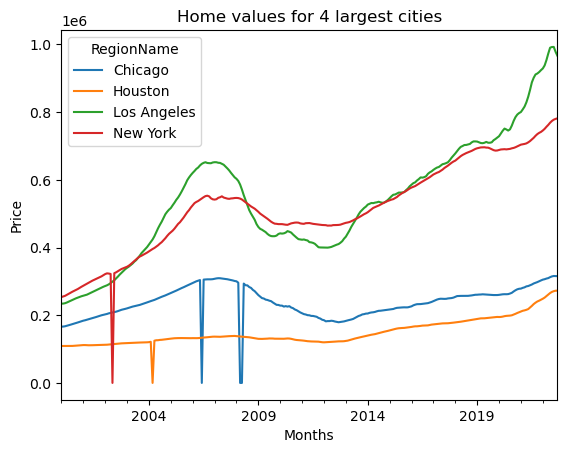

In [44]:
ax = unstacked['Price'].plot()
ax.set(title='Home values for 4 largest cities', ylabel="Price")
plt.show()

In [45]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)


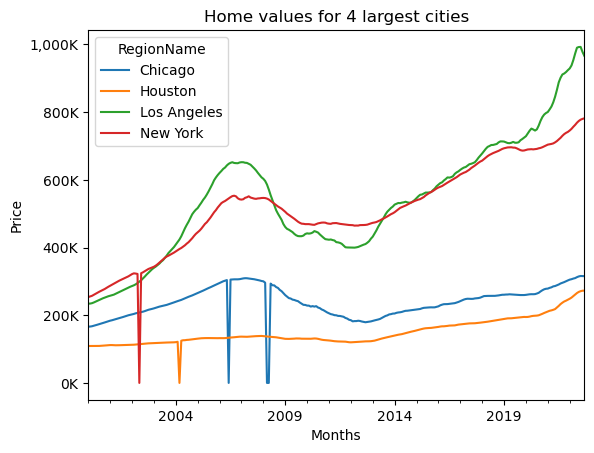

In [46]:
ax = unstacked['Price'].plot()
ax.set(title='Home values for 4 largest cities', ylabel="Price")
## Set the axis' major formatter
ax.yaxis.set_major_formatter(fmt_thous)



## 1a Which City had the highest Typical Home Value at the end of 2008? 

In [47]:
df_2008 = df_groupby.loc[pd.IndexSlice[:, '2008'],:]
df_2008

RegionID  SizeRank     Price
RegionName  Months                                  
Chicago     2008-01-31     17426         3  300207.0
            2008-02-29     17426         3  296063.0
            2008-03-31     17426         3       0.0
            2008-04-30     17426         3       0.0
            2008-05-31     17426         3  293467.0
            2008-06-30     17426         3  288495.0
            2008-07-31     17426         3  288174.0
            2008-08-31     17426         3  283199.0
            2008-09-30     17426         3  280695.0
            2008-10-31     17426         3  274849.0
            2008-11-30     17426         3  271059.0
            2008-12-31     17426         3  265306.0
Houston     2008-01-31     39051         2  138208.0
            2008-02-29     39051         2  137512.0
            2008-03-31     39051         2  136795.0
            2008-04-30     39051         2  136628.0
            2008-05-31     39051         2  136228.0
            2008-06-30     39051         2  135773.0
            2008-07-31     39051         2  135392.0
            2008-08-31     39051         2  134770.0
            2008-09-30     39051         2  133932.0
            2008-10-31     39051         2  133189.0
            2008-11-30     39051         2  132247.0
            2008-12-31     39051         2  131283.0
Los Angeles 2008-01-31     12447         1  603029.0
            2008-02-29     12447         1  596635.0
            2008-03-31     12447         1  586065.0
            2008-04-30     12447         1  571226.0
            2008-05-31     12447         1  554589.0
            2008-06-30     12447         1  539622.0
            2008-07-31     12447         1  524220.0
            2008-08-31     12447         1  510520.0
            2008-09-30     12447         1  500124.0
            2008-10-31     12447         1  490979.0
            2008-11-30     12447         1  481905.0
            2008-12-31     12447         1  469294.0
New York    2008-01-31      6181         0  546538.0
            2008-02-29      6181         0  546098.0
            2008-03-31      6181         0  544562.0
            2008-04-30      6181         0  541865.0
            2008-05-31      6181         0  537685.0
            2008-06-30      6181         0  533810.0
            2008-07-31      6181         0  529211.0
            2008-08-31      6181         0  525290.0
            2008-09-30      6181         0  521347.0
            2008-10-31      6181         0  518048.0
            2008-11-30      6181         0  514767.0
            2008-12-31      6181         0  510309.0

In [48]:
highest_values = df_2008['Price'].idxmax()
highest_values

('Los Angeles', Timestamp('2008-01-31 00:00:00', freq='M'))

In [49]:
highest_values[0]

'Los Angeles'

In [50]:
# check values
df_2008.loc[highest_values]

RegionID     12447.0
SizeRank         1.0
Price       603029.0
Name: (Los Angeles, 2008-01-31 00:00:00), dtype: float64

In [51]:
# slice out each value into a new variable
RegionID, SizeRank, Price = df_2008.loc[highest_values]
RegionID, SizeRank, Price


(12447.0, 1.0, 603029.0)

In [52]:
print(f'{highest_values[0]} had the highest Typical Home Value at the end of 2008, the price was {Price}')

Los Angeles had the highest Typical Home Value at the end of 2008, the price was 603029.0


## 1b Which City had the had the least Typical Home Value at the end of 2008

In [53]:
least_values = df_2008['Price'].idxmin()
least_values

('Chicago', Timestamp('2008-03-31 00:00:00', freq='M'))

In [54]:
least_values[0]

'Chicago'

In [55]:
# check values
df_2008.loc[least_values]

RegionID    17426.0
SizeRank        3.0
Price           0.0
Name: (Chicago, 2008-03-31 00:00:00), dtype: float64

Something is wrong, the price can't be zero. Let's remove price===0 from dataframe 

In [56]:
filter_zero = df_2008['Price'] == 0
# check free houses 
df_2008.loc[filter_zero]

RegionID  SizeRank  Price
RegionName Months                               
Chicago    2008-03-31     17426         3    0.0
           2008-04-30     17426         3    0.0

In [57]:
# Let's drop these 2 row 
df_2008_clean = df_2008.loc[~filter_zero]


In [58]:
# check the size 
print(len(df_2008_clean))
print(len(df_2008))

46
48


In [59]:
# now repeat whit df_clean 
least_values = df_2008_clean['Price'].idxmin()
least_values

('Houston', Timestamp('2008-12-31 00:00:00', freq='M'))

In [60]:
least_values[0]

'Houston'

In [61]:
# check values
df_2008_clean.loc[least_values]

RegionID     39051.0
SizeRank         2.0
Price       131283.0
Name: (Houston, 2008-12-31 00:00:00), dtype: float64

In [62]:
# slice out each value into a new variable
RegionID, SizeRank, Price = df_2008_clean.loc[least_values]
RegionID, SizeRank, Price

(39051.0, 2.0, 131283.0)

In [63]:
print(f'{least_values[0]} had the lowest Home Value at the end of 2008, the price was {Price}')

Houston had the lowest Home Value at the end of 2008, the price was 131283.0


## 2- How much did the home values change from November 2008 to December 2008 (in dollars)?
Hint: you can use .diff() to calculate the change in values

In [91]:
# loc Nov data
df_2008_all_cities_nov = df_ts.loc['2008-11']
df_2008_all_cities_nov

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Price
Months,,,,,,,,,
2008-11-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,514767.0
2008-11-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,481905.0
2008-11-30,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,132247.0
2008-11-30,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,271059.0


In [92]:
# price Nov
price_nov = df_2008_all_cities_nov['Price'].mean()
price_nov

349994.5

In [93]:
# loc Dez data
df_2008_all_cities_dez = df_ts.loc['2008-12']
df_2008_all_cities_dez

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Price
Months,,,,,,,,,
2008-12-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,510309.0
2008-12-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,469294.0
2008-12-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,131283.0
2008-12-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,265306.0


In [95]:
# Price Dez
price_dez = df_2008_all_cities_dez['Price'].mean()
price_dez

344048.0

In [96]:
# find values change 
diff = price_dez - price_nov
diff

-5946.5

In [101]:
print(f'In New York, Los Angeles, Houston, and Chicago the average price houses in November was {price_nov}, and in Dezember was {price_dez} the difference was {diff} dollars.')

In New York, Los Angeles, Houston, and Chicago the average price houses in November was 349994.5, and in Dezember was 344048.0 the difference was -5946.5 dollars.


In [105]:
# use .diff()???
#df_2008_nov_dez = df_ts.loc['2008-11': '2008-12']
#df_2008_nov_dez['Price'].diff()